<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-prep" data-toc-modified-id="Data-prep-1">Data prep</a></span></li><li><span><a href="#Sklearn-classifiers" data-toc-modified-id="Sklearn-classifiers-2">Sklearn classifiers</a></span><ul class="toc-item"><li><span><a href="#GradientBoostingClassifier" data-toc-modified-id="GradientBoostingClassifier-2.1">GradientBoostingClassifier</a></span></li><li><span><a href="#HistGradientBoostingClassifier" data-toc-modified-id="HistGradientBoostingClassifier-2.2">HistGradientBoostingClassifier</a></span></li></ul></li><li><span><a href="#XGBoost-classifier" data-toc-modified-id="XGBoost-classifier-3">XGBoost classifier</a></span></li></ul></div>

In [9]:
# Imports 

import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm

import sys
sys.path.append("/home/scottd/Dropbox/Other-Programming/SP500-Trading/data_wrangling/")
from data_wrangling import TickerData

# Data prep

In [2]:
# Data loading 
ticker_data = TickerData("/home/scottd/Dropbox/Other-Programming/SP500-Trading/data/")
ds = ticker_data.create_torch_dataset(t0=dt.time(19, 0), t1=dt.time(20, 55), N_classes=2)

Class value: tensor(False) 	 Instance count: tensor(52157)
Class value: tensor(True) 	 Instance count: tensor(51208)


Since sklearn doesn't need torch datasets we convert everything to plain old numpy arrays then split into training and testing sets:

In [65]:
# Code 
X = []
Y = []
ratios = []
for (x, y, r) in tqdm(ds):
    X.append(x.numpy().flatten()) #sklearn classifiers only accept 1D input so need to flatten here
    Y.append(y.item())
    ratios.append(r.item())
X, Y, ratios = map(np.array, [X, Y, ratios])
    
X_train, X_test, Y_train, Y_test, R_train, R_test = train_test_split(X, Y, ratios, shuffle=False, test_size=0.05)

100%|███████████████████████████████████████████████████████████████████████| 103365/103365 [00:00<00:00, 130923.37it/s]


Check the distribution of profit ratios in train/test sets:

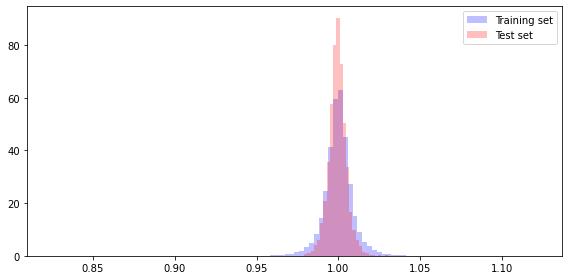

In [66]:
# Code 
fig, ax = plt.subplots(figsize=(8, 4))

kwargs = {"bins":100, "histtype":"bar", "alpha":0.25, "density":True}
ax.hist(R_train, color="b", label="Training set", **kwargs)
ax.hist(R_test, color="r", label="Test set", **kwargs)
ax.legend()

plt.tight_layout()

# Sklearn classifiers

## GradientBoostingClassifier

In [74]:
# Code 
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(
    n_estimators=10,
    verbose=True, #Print progress info during training
)
model.fit(X_train, Y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3768            2.92m
         2           1.3696            2.60m
         3           1.3596            2.26m
         4           1.3494            1.93m
         5           1.3424            1.61m
         6           1.3349            1.29m
         7           1.3260           57.87s
         8           1.3207           38.65s
         9           1.3137           19.32s
        10           1.3080            0.00s


GradientBoostingClassifier(n_estimators=10, verbose=True)

In [78]:
Y_train_pred = model.predict(X_train)
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

       False       0.65      0.76      0.70     49289
        True       0.71      0.58      0.64     48907

    accuracy                           0.67     98196
   macro avg       0.68      0.67      0.67     98196
weighted avg       0.68      0.67      0.67     98196



In [79]:
Y_test_pred = model.predict(X_test)
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

       False       0.56      0.24      0.33      2868
        True       0.45      0.77      0.56      2301

    accuracy                           0.47      5169
   macro avg       0.50      0.50      0.45      5169
weighted avg       0.51      0.47      0.44      5169



## HistGradientBoostingClassifier

In [93]:
# Code 
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier(
    verbose=True, #Print progress info during training
)
model.fit(X_train, Y_train)

Binning 0.958 GB of training data: 10.347 s
Binning 0.106 GB of validation data: 0.068 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.67496, val loss: 0.67593, in 0.132s
[2/100] 1 tree, 31 leaves, max depth = 13, train loss: 0.65922, val loss: 0.66072, in 0.130s
[3/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.64596, val loss: 0.64784, in 0.133s
[4/100] 1 tree, 31 leaves, max depth = 15, train loss: 0.63429, val loss: 0.63620, in 0.131s
[5/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.62412, val loss: 0.62635, in 0.132s
[6/100] 1 tree, 31 leaves, max depth = 12, train loss: 0.61520, val loss: 0.61746, in 0.137s
[7/100] 1 tree, 31 leaves, max depth = 14, train loss: 0.60751, val loss: 0.61000, in 0.134s
[8/100] 1 tree, 31 leaves, max depth = 11, train loss: 0.60051, val loss: 0.60331, in 0.133s
[9/100] 1 tree, 31 leaves, max depth = 10, train loss: 0.59445, val loss: 0.59745, in 0.130s
[10/100] 1 tree, 31 leaves, max depth = 1

HistGradientBoostingClassifier(verbose=True)

In [97]:
print(classification_report(Y_train, model.predict(X_train)))

              precision    recall  f1-score   support

       False       0.74      0.73      0.74     49289
        True       0.73      0.74      0.74     48907

    accuracy                           0.74     98196
   macro avg       0.74      0.74      0.74     98196
weighted avg       0.74      0.74      0.74     98196



In [98]:
print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.55      0.33      0.41      2868
        True       0.44      0.65      0.53      2301

    accuracy                           0.48      5169
   macro avg       0.49      0.49      0.47      5169
weighted avg       0.50      0.48      0.46      5169



# XGBoost classifier

array([0, 1, 1, ..., 0, 0, 1], dtype=int16)

In [122]:
# Code 
import xgboost as xgb

model = model = xgb.XGBClassifier(n_estimators=100, n_jobs=10, verbosity=2, use_label_encoder=False)
model.fit(X_train, Y_train)

/home/scottd/anaconda3/envs/ml-env-pytorch/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:35:11] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 116 extra nodes, 0 pruned nodes, max_depth=6
[11:35:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:35:11] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[11:35:12] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=6
[11:35:13] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[11:35:14] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 106 extra nodes, 0 pruned nodes, max_depth=6
[11:35:15] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=6
[11:35:15] INFO: ../src/tree/updater_prune.cc:101: tree pruning 

[11:35:59] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 110 extra nodes, 0 pruned nodes, max_depth=6
[11:36:00] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[11:36:01] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 116 extra nodes, 0 pruned nodes, max_depth=6
[11:36:01] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[11:36:02] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 116 extra nodes, 0 pruned nodes, max_depth=6
[11:36:03] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[11:36:04] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[11:36:05] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 120 extra nodes, 0 pruned nodes, max_depth=6
[11:36:05] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 118 extra nodes, 0 pru

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=10,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=2)

In [123]:
print(classification_report(Y_train, model.predict(X_train)))

              precision    recall  f1-score   support

       False       0.82      0.81      0.81     49289
        True       0.81      0.82      0.82     48907

    accuracy                           0.81     98196
   macro avg       0.81      0.81      0.81     98196
weighted avg       0.81      0.81      0.81     98196



In [124]:
print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.56      0.40      0.47      2868
        True       0.45      0.61      0.52      2301

    accuracy                           0.49      5169
   macro avg       0.50      0.50      0.49      5169
weighted avg       0.51      0.49      0.49      5169



In [125]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=10,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=2)

In [127]:
model = xgb.XGBClassifier(
    n_estimators=100, 
    n_jobs=10, 
    tree_method="hist", 
    verbosity=1, 
    use_label_encoder=False,
)
model.fit(X_train, Y_train)

[11:37:54] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[11:37:54] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[11:37:57] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[11:37:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:37:57] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[11:37:57] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[11:37:57] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quan

[11:38:04] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:38:04] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[11:38:04] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=6
[11:38:04] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[11:38:04] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[11:38:04] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[11:38:05] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=6
[11:38:05] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[11:38:05

[11:38:11] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[11:38:11] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[11:38:11] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[11:38:11] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[11:38:11] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:38:11] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[11:38:12] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 114 extra nodes, 0 pruned nodes, max_depth=6
[11:38:12] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.
[11:38:12]

[11:38:18] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 120 extra nodes, 0 pruned nodes, max_depth=6
[11:38:18] INFO: ../src/gbm/gbtree.cc:177: Tree method is selected to be 'hist', which uses a single updater grow_quantile_histmaker.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=10,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='hist', use_label_encoder=False,
              validate_parameters=1, verbosity=2)

In [128]:
print(classification_report(Y_train, model.predict(X_train)))

              precision    recall  f1-score   support

       False       0.82      0.82      0.82     49289
        True       0.82      0.82      0.82     48907

    accuracy                           0.82     98196
   macro avg       0.82      0.82      0.82     98196
weighted avg       0.82      0.82      0.82     98196



In [129]:
print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.56      0.44      0.49      2868
        True       0.45      0.56      0.50      2301

    accuracy                           0.49      5169
   macro avg       0.50      0.50      0.49      5169
weighted avg       0.51      0.49      0.49      5169

